Predicted:7
Ground truth:7


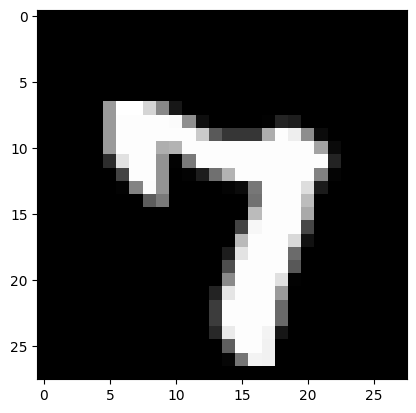

In [45]:
from utils import mnist_data_retriever
from microcnn import nn
import pickle
import matplotlib.pyplot as plt
import random

test_images, test_labels = mnist_data_retriever(9000, 10000, train_bool=False)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

test_id = random.randint(0, 1000)
test_image = test_images[test_id]
test_label = test_labels[test_id]
test_label = [val.data for val in test_label]

real_image = [val.data * 255.0 for val in test_image]
reshaped_image_data = [real_image[n:n+28] for n in range(0, len(real_image), 28)]
plt.imshow(reshaped_image_data, cmap='gray')

model_out = [val.data for val in model.forward(test_image)]

y_gt = max(enumerate(test_label), key=lambda pair: pair[1])[0]
y_pred = max(enumerate(model_out), key=lambda pair: pair[1])[0]

print(f"Predicted:{y_pred}")
print(f"Ground truth:{y_gt}")